<a href="https://colab.research.google.com/github/skhabiri/DS-Unit-1-Sprint-2-Statistics/blob/master/module2/LS_DS17_122_Chi2_Tests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 122
## Hypothesis Testing - Chi2 Tests

## Prepare - examine other available hypothesis tests

If you had to pick a single hypothesis test in your toolbox, t-test would probably be the best choice - but the good news is you don't have to pick just one! Here's some of the others to be aware of:

* t-test distribution is thiner than normal distribution for lower degree of fredom (less than 9, DOF=#Samples-1). When degree of fredom increases, t-test distribution gets closer to normal distribution and t statistics becomes closer to normal distribution std. at infinite samples, for critical value of 5%, t-statistics is 1.96 which is the same as normal distribution tabulated number.

* Z-test is basically normal distribution with differnet values for std.

* since t-test distribution adopts different form based on the DOF, hence it's a better candidate for samlled as well as the larger number of samples. Ont eh other hand, Z-test distribution is onle good for large DOF which is basically corresponding to normal distribution.

* Both t-tests and chi-square tests are statistical tests, designed to test, and possibly reject, a null hypothesis. The null hypothesis is usually a statement that something is zero, or that something does not exist. For example, you could test the hypothesis that the difference between two means is zero, or you could test the hypothesis that there is no relationship between two variables.

* A t-test tests a null hypothesis about two means; most often, it tests the hypothesis that two means are equal, or that the difference between them is zero. Mostly numerical.

* A chi-square test tests a null hypothesis about the relationship between two variables. Mostly categorical. For larger DOF, the chi2 curve approaches the normal distribution.

In [0]:
import numpy as np
from scipy.stats import chisquare  # One-way chi square test

# Chi square can take any crosstab/table and test the independence of rows/cols
# The null hypothesis is that the rows/cols are independent -> low chi square
# The alternative is that there is a dependence -> high chi square
# Be aware! Chi square does *not* tell you direction/causation
# Null means lack of dependencies

# Fail to reject the Null hypo of "lack of dependency", i.e Null is plausible
ind_obs = np.array([[1, 1], [2, 2]]).T
print(ind_obs)
print(type(ind_obs), ind_obs.shape)
print(chisquare(ind_obs, axis=None))

# Reject the Null hypo, of "lack of dependency",i.e the two variables are not independant
dep_obs = np.array([[16, 18, 16, 14, 12, 12], [32, 24, 16, 28, 20, 24]]).T
print(dep_obs)
print(chisquare(dep_obs, axis=None))

[[1 2]
 [1 2]]
<class 'numpy.ndarray'> (2, 2)
Power_divergenceResult(statistic=0.6666666666666666, pvalue=0.8810148425137847)
[[16 32]
 [18 24]
 [16 16]
 [14 28]
 [12 20]
 [12 24]]
Power_divergenceResult(statistic=23.31034482758621, pvalue=0.015975692534127565)


In [0]:
import matplotlib.pyplot as plt


(1000,)
NormaltestResult(statistic=51.25599241059362, pvalue=7.411441172637759e-12)


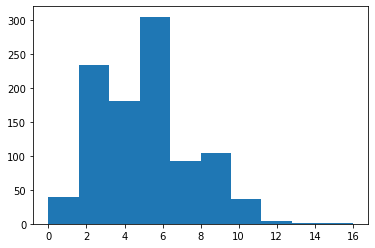

In [0]:
# Distribution tests:
# We often assume that something is normal, but it can be important to *check*

# For example, later on with predictive modeling, a typical assumption is that
# residuals (prediction errors) are normal - checking is a good diagnostic

from scipy.stats import normaltest
# Poisson models arrival times and is related to the binomial (coinflip)
sample = np.random.poisson(5, 1000)
print(sample.shape)
plt.hist(sample)
print(normaltest(sample))  # Pretty clearly not normal

In [0]:
# Kruskal-Wallis H-test - compare the median rank between 2+ groups
# Can be applied to ranking decisions/outcomes/recommendations
# The underlying math comes from chi-square distribution, and is best for n>5
from scipy.stats import kruskal

x1 = [1, 3, 5, 7, 9]
y1 = [2, 4, 6, 8, 10]
print(kruskal(x1, y1))  # x1 is a little better, but not "significantly" so

x2 = [1, 1, 1]
y2 = [2, 2, 2]
z = [2, 2]  # Hey, a third group, and of different size!
print(kruskal(x2, y2, z))  # x clearly dominates

KruskalResult(statistic=0.2727272727272734, pvalue=0.6015081344405895)
KruskalResult(statistic=7.0, pvalue=0.0301973834223185)


And there's many more! `scipy.stats` is fairly comprehensive, though there are even more available if you delve into the extended world of statistics packages. As tests get increasingly obscure and specialized, the importance of knowing them by heart becomes small - but being able to look them up and figure them out when they *are* relevant is still important.

## T-test Assumptions

<https://statistics.laerd.com/statistical-guides/independent-t-test-statistical-guide.php>

- Independence of means.

Are the means of our voting data independent (do not affect the outcome of one another)?
  
The best way to increase the likelihood of our means being independent is to randomly sample (which we did not do).


In [0]:
from scipy.stats import ttest_ind

?ttest_ind

- "Homogeneity" of Variance? 

Is the magnitude of the variance between the two roughly the same?

I think we're OK on this one for the voting data, although it probably could be better, one party was larger than the other.

If we suspect this to be a problem then we can use Welch's T-test

In [0]:
?ttest_ind

- "Dependent Variable" (sample means) are Distributed Normally

<https://stats.stackexchange.com/questions/9573/t-test-for-non-normal-when-n50>

Lots of statistical tests depend on normal distributions. We can test for normality using Scipy as was shown above.

This assumption is often assumed even if the assumption is a weak one. If you strongly suspect that things are not normally distributed, you can transform your data to get it looking more normal and then run your test. This problem typically goes away for large sample sizes (yay Central Limit Theorem) and is often why you don't hear it brought up. People declare the assumption to be satisfied either way. 



## Degrees of Freedom 

<https://blog.minitab.com/blog/statistics-and-quality-data-analysis/what-are-degrees-of-freedom-in-statistics>

![Degrees of Freedom](https://blog.minitab.com/hubfs/Imported_Blog_Media/hats.png)

In [0]:
# Degrees of freeom is n-1 because we've already estimated the sample mean
# one of our sample size, "used up" in keeping the mean as a fixed value

sample_mean = 20
n=5
last_num = 0
sample = [40, 10, 25, 30, last_num]

last_num = 20*5-105
last_num

-5

![alt text](https://)## T Statistic -> P-value

T-statistics value approaches 1.96(normal dist. std) for 5% and large DoF

[U of Iowa T-statistic Applet](https://homepage.divms.uiowa.edu/~mbognar/applets/t.html)

![T-statistic table](https://www.biologyforlife.com/uploads/2/2/3/9/22392738/ttable.png)

# Chi^2 Tests

##  $\chi^2$ Test for goodness of fit

(One sample chi^2 test - this will **not** be on the sprint challenge)


| Roll:     |  1  |  2  |  3  |  4  |  5  |  6  |
|-----------|-----|-----|-----|-----|-----|-----|
| Observed: |  27 | 13  |  10 | 15  | 30  |  32 |
| Expected: |  21.16 | 21.16  | 21.16  |  21.16 | 21.16  | 21.16  |

Being able to do chi^2 tests with only only 1 categorical variable is **NOT** an objective of this sprint. I'm merely starting simple to introduce the concept. You will need to know the version of the chi^2 test that compares two categorical variables (test for independence).


Chi^2 tests measure the degree to which observed frequencies match expected frequencies across many categories. 

An expected frequency is:

\begin{align}
\frac{\text{total observations}}{\text{# categories}}
\end{align}

In [0]:
import numpy as np

observed = np.array([27,13,10,15,30,32])

observed

array([27, 13, 10, 15, 30, 32])

In [0]:
n = observed.sum()
n

127

In [0]:
expected_frequency = 127/len(observed)

expected_frequency

21.166666666666668

Null Hypothesis: This is a fair die, i.e. lack of dependencies between different outcome values. Expected Frequencies == Observed Frequencies

Alternative Hypothesis: Unfair die. Expected Frequencies != Observed Frequencies

In [0]:
observed

array([27, 13, 10, 15, 30, 32])

In [0]:
# expected = np.array([21.16, 21.16, 21.16, 21.16, 21.16, 21.16])
expected = np.array([expected_frequency]*6)
expected

array([21.16666667, 21.16666667, 21.16666667, 21.16666667, 21.16666667,
       21.16666667])

### Calculate the chi^2 statistic (test statistic)

\begin{align}
\chi^2 = \sum \frac{(observed_i-expected_i)^2}{(expected_i)}
\end{align}

In [0]:
# For cell 3 (index position 2)

observed[2] - expected[2]

-11.166666666666668

In [0]:
observed-expected

array([  5.83333333,  -8.16666667, -11.16666667,  -6.16666667,
         8.83333333,  10.83333333])

In [0]:
(observed - expected)**2

array([ 34.02777778,  66.69444444, 124.69444444,  38.02777778,
        78.02777778, 117.36111111])

In [0]:
(observed - expected)**2 / expected

array([1.60761155, 3.15091864, 5.89107612, 1.79658793, 3.68635171,
       5.54461942])

Squared term makes all the values positive and emphasizes places where we saw a large deviation between observed and expected frequencies.

In [0]:
chi2 = ((observed - expected)**2 / expected).sum()

chi2

21.67716535433071

# Looking up the table for DoF=5, Based on a chi^2 statistic of 21.68 and a p-value of .0006, I **reject** the null hypothesis, that observed frequencies are equal to expected frequencies (that that this is a fair die) and suggest the alternative, that this is an unfair die. 



## $\chi^2$ Test for independence

(two sample chi^2 test)

<https://en.wikipedia.org/wiki/Chi-squared_test>

We'll use this dataset of student performance from UCI as it has a lot of good variables to use: 

<https://archive.ics.uci.edu/ml/datasets/Student+Performance>

In [0]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip

--2020-06-09 20:55:25--  https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20478 (20K) [application/x-httpd-php]
Saving to: ‘student.zip’

student.zip         100%[===================>]  20.00K  --.-KB/s    in 0.04s   

2020-06-09 20:55:26 (556 KB/s) - ‘student.zip’ saved [20478/20478]



In [0]:
!unzip student.zip

Archive:  student.zip
  inflating: student-mat.csv         
  inflating: student-por.csv         
  inflating: student-merge.R         
  inflating: student.txt             


In [0]:
from scipy import stats
import pandas as pd

In [0]:
df = pd.read_csv('student-mat.csv', sep=';')

print(df.shape)
df.head()

(395, 33)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [0]:
df['failures'].value_counts().sort_index()

0    312
1     50
2     17
3     16
Name: failures, dtype: int64

In [0]:
df['studytime'].value_counts().sort_index()

1    105
2    198
3     65
4     27
Name: studytime, dtype: int64

In [0]:
contingency = pd.crosstab(df['failures'], df['studytime'])

contingency

studytime,1,2,3,4
failures,,,,
0,74,158,54,26
1,16,26,7,1
2,6,7,4,0
3,9,7,0,0


In [0]:
chi2, p_value, dof, expected = stats.chi2_contingency(contingency)

print("chi2 statistic", chi2)
print("p value", p_value)
print("degrees of freedom",dof)
print("expected frequencies table", expected)

chi2 statistic 16.21199080868576
p value 0.06258448399974005
degrees of freedom 9
expected frequencies table [[ 82.93670886 156.39493671  51.34177215  21.32658228]
 [ 13.29113924  25.06329114   8.2278481    3.41772152]
 [  4.51898734   8.52151899   2.79746835   1.16202532]
 [  4.25316456   8.02025316   2.63291139   1.09367089]]


Conclusion: There is not enough evidence to conclude that study time and failures are associated (show a relationship). They *might* be independent.

In [0]:
# How's this different
print(chisquare(contingency , axis=None))

Power_divergenceResult(statistic=1032.6455696202531, pvalue=1.3527280112762831e-210)


In [0]:
df['sex'].value_counts()

F    208
M    187
Name: sex, dtype: int64

In [0]:
df['internet'].value_counts()

yes    329
no      66
Name: internet, dtype: int64

In [0]:
contingency = pd.crosstab(df['sex'], df['internet'])

In [0]:
chi2, p_value, dof, expected = stats.chi2_contingency(contingency)

print("chi2 statistic", chi2)
print("p value", p_value)
print("degrees of freedom",dof)
print("expected frequencies table", expected)

chi2 statistic 0.5500617337279294
p value 0.45829247086513125
degrees of freedom 1
expected frequencies table [[ 34.75443038 173.24556962]
 [ 31.24556962 155.75443038]]


Null Hypothesis: These two variables are "independent" there's no relationship between the two 

Alternative Hypothesis: The two variables are "dependent" there *is* a relationship or association between them.

## Run a $\chi^{2}$ Test "by hand" (Using Numpy)

In [0]:
df['sex'].value_counts()

F    208
M    187
Name: sex, dtype: int64

In [0]:
df['internet'].value_counts()

yes    329
no      66
Name: internet, dtype: int64

In [0]:
observed1 = pd.crosstab(df['sex'], df['internet'])
print(observed1.shape, type(observed1))
observed1

(2, 2) <class 'pandas.core.frame.DataFrame'>


internet,no,yes
sex,,
F,38,170
M,28,159


## Expected Value Calculation
\begin{align}
expected_{i,j} =\frac{(row_{i} \text{total})(column_{j} \text{total}) }{(\text{total observations})}  
\end{align}

In [0]:
observed_with_margins = pd.crosstab(df['sex'], df['internet'], margins=True)

observed_with_margins

internet,no,yes,All
sex,,,
F,38,170,208
M,28,159,187
All,66,329,395


* For Total to be 395 from row and column side, the matrix elements should have no overlap from one element to another

Make an expected value table that matches the size and shape of our observed value table

In [0]:
observed = observed1.values
print(observed.shape, type(observed))
observed

(2, 2) <class 'numpy.ndarray'>


array([[ 38, 170],
       [ 28, 159]])

In [0]:
observed[1][1]
# This indexing would not work on observed1, which is a dataframe. It would need iloc method

159

In [0]:
# (row_total)(column_total) / sample_size 

expected_row1_col1 = 208*66/395


expected_row1_col1


34.754430379746836

In [0]:
# .value converts the dataframe into ndarray
row_totals = df['internet'].value_counts().sort_index().values

row_totals

array([ 66, 329])

In [0]:
## alternative method - pulling row totals directly off of the crosstab

print(observed_with_margins.iloc[2, 0:2])
print(type(observed_with_margins.iloc[2:4, 0:2]))
print(observed_with_margins.iloc[2:4, 0:2].shape)


internet
no      66
yes    329
Name: All, dtype: int64
<class 'pandas.core.frame.DataFrame'>
(1, 2)


In [0]:
# Becomes a one dimension ndarray (row dimension dropped)
print(observed_with_margins.iloc[2, 0:2].values)
print(type(observed_with_margins.iloc[2, 0:2].values))
print(observed_with_margins.iloc[2, 0:2].values.shape)
print(observed_with_margins.iloc[2, 0:2].values.ndim)

[ 66 329]
<class 'numpy.ndarray'>
(2,)
1


In [0]:
# Becomes a two dimension ndarray (row dimension maintained by the inner brackets representing the 1st row of the total of 1 row)
print(observed_with_margins.iloc[2:4, 0:2].values)
print(type(observed_with_margins.iloc[2:4, 0:2].values))
print(observed_with_margins.iloc[2:4, 0:2].values.shape)
print(observed_with_margins.iloc[2:4, 0:2].values.ndim)

[[ 66 329]]
<class 'numpy.ndarray'>
(1, 2)
2


In [0]:
row_totals = observed_with_margins.iloc[2, 0:2].values

row_totals

array([ 66, 329])

In [0]:
# .values make an array
col_totals = df['sex'].value_counts().sort_index().values

col_totals

array([208, 187])

In [0]:
df['sex'].value_counts().sort_index()

F    208
M    187
Name: sex, dtype: int64

In [0]:
## alternative method - pulling column totals directly off of the crosstab
## T[0] grabs the 1st row of a total of one row. However, the dimension reduces from 2 to 1
col_totals = observed_with_margins.iloc[0:2, 2:3].values.T[0]
print(col_totals.ndim)
print(col_totals.shape)

col_totals

1
(2,)


array([208, 187])

In [0]:
sample_size = df.shape[0]

sample_size

395

In [0]:
expected = np.array([[0,1],[2,3]])
expected[1][0]

2

In [0]:
len(row_totals)

2

In [0]:
expected = np.array([[0,0],
                     [0,0]])

for j, col in enumerate(col_totals):
  for i, row in enumerate(row_totals): 
    expected_value = (row_totals[i]*col_totals[j] / sample_size)
    print(expected_value, i, j,'\n')
    expected[j][i] = expected_value

expected

34.754430379746836 0 0 

173.24556962025318 1 0 

31.245569620253164 0 1 

155.75443037974682 1 1 



array([[ 34, 173],
       [ 31, 155]])

In [0]:
observed

array([[ 38, 170],
       [ 28, 159]])

### Calculate the chi^2 statistic (test statistic)

\begin{align}
\chi^2 = \sum \frac{(observed_i-expected_i)^2}{(expected_i)}
\end{align}

In [0]:
((observed - expected)**2 / expected).sum()

0.9161597437781752

Degrees of Freedom is different in the 2-variable chi^2 test (test for independence)

1-sample (goodness of fit), DOF = # categories-1

2-sample (test for independence), DOF = (# rows_crosstab-1)*(# cols_crosstab-1)

DOF: 1

*Use* the chi^2 statistic to get to a p-value:

[U Iowa chi^2 applet](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)

p-value = .3385

Conclusion: Based on a chi2 statistic of .926, and a p-value of .3385, we fail to reject the null hypothesis that sex and internet access at home are independent. 